In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
# from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn import preprocessing
# from geopy import geocoders 
# from geopy.geocoders import Nominatim

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
used_car = pd.read_csv(r'C:\Users\tab\Desktop\Modul 3\tugas akhir\dataset231\used_cars.csv', encoding="utf-8")
used_car.head()

,id,title,band,model,variant,fuelType,bodytype,tramsmission,seating,year,milage,color,image,place,price
0,50318,2010 Nissan X-Trail 2.0 T31 SUV,Nissan,X-Trail,T31,Pertamax,SUV,Manual,5,2010,250,Silver,https://img4.icarcdn.com/2200806/thumb-l_used-...,Wonogiri,115000000
1,19882,2012 Mazda 2 1.5 S Sedan,Mazda,2,S,Pertamax,Sedan,Manual,5,2012,67500,Hijau,https://img2.icarcdn.com/8715916/thumb-l_used-...,Surabaya,105000000
2,29381,2014 Honda Odyssey 2.4 Prestige 2.4 MPV,Honda,Odyssey,Prestige 2.4,Pertamax,MPV,Automatic,6,2014,64000,Hitam,https://img3.icarcdn.com/6198256/thumb-l_used-...,Jakarta Selatan,355000000
3,22517,2016 Mitsubishi Pajero Sport 2.5 Dakar SUV,Mitsubishi,Pajero Sport,Dakar,Solar,SUV,Automatic,7,2016,17500,Hitam,https://img5.icarcdn.com/1648605/thumb-l_used-...,Bandung,455000000
4,7046,2008 Mercedes-Benz C200K 1.8 Kompressor Sedan,Mercedes-Benz,C200K,Kompressor,Pertamax,Sedan,Automatic,5,2008,50000,Silver,https://img5.icarcdn.com/1269795/thumb-l_used-...,Jakarta Utara,162000000


This is the data of Indonesian's used car that containing price, model, and their many different features. This dataset was uploaded by Remko Weingarten at 20-07-2020 in atapdata.ai for data analysis purposes.

In [4]:
used_car.rename(columns={'tramsmission':'transmission'}, inplace=True)

In [5]:
len(used_car)

89585

This dataset contains 89585 rows of used car information that contain many information such as :

1. id : identifier
2. title : car's name (car's brand, car's model, car's variant, and car's year production)
3. band : car's brand
4. model : car's model
5. variant : car's variant
6. Fuel Type : type of gasoline (pertamax, solar, premium)
7. transmision : transmision type (manual/automatic)
8. seating : number of seat
9. year : car's year production
10. milage : number of distance traveled (using kilometre)
11. color : color of car
12. image : picture of car
13. place : place of sales
14. price : price of car

## Exploratory Data Analysis

This step is to analyzing dataset and collecting information from each of its columns. 

In [6]:
used_car.describe().T

,count,mean,std,min,25%,50%,75%,max
id,89585.0,4.479300e+04,2.586111e+04,1.0,22397.0,44793.0,67189.0,8.958500e+04
year,89585.0,2.013376e+03,4.204212e+00,1955.0,2012.0,2014.0,2016.0,2.020000e+03
milage,89585.0,5.865850e+04,6.761847e+04,1.0,25000.0,50000.0,80000.0,5.000000e+06
price,89585.0,2.660582e+08,3.860866e+08,93000.0,115000000.0,155000000.0,245000000.0,1.300000e+10


In [7]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89585 entries, 0 to 89584
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            89585 non-null  int64 
 1   title         89585 non-null  object
 2   band          89585 non-null  object
 3   model         89585 non-null  object
 4   variant       87482 non-null  object
 5   fuelType      89583 non-null  object
 6   bodytype      89392 non-null  object
 7   transmission  89585 non-null  object
 8   seating       89585 non-null  object
 9   year          89585 non-null  int64 
 10  milage        89585 non-null  int64 
 11  color         89585 non-null  object
 12  image         89585 non-null  object
 13  place         89585 non-null  object
 14  price         89585 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 10.3+ MB


In [8]:
list_item = []
for col in used_car.columns:
    list_item.append([col, used_car[col].dtype, used_car[col].isna().sum(), round((used_car[col].isna().sum()/len(used_car[col]))*100,2),
                      used_car[col].nunique()])

desc = pd.DataFrame(columns=['column', 'dtype', 'NumbOfNull', 'NullPercent', 'NUnique'],data=list_item)

## Feature Selection

First step to select columns that to be trained is drop many unimportant column which only as identifier and doesn't make any corelation with other feature such as :


1. ID : This feature only as identifier and doesn't make any corelation with any other feature, so it is better to drop this feature
2. Image : This feature is stored as image data and can't be encoded as numeric value, since machine learning is only recognized numeric value, for the sake of simplicity is better to drop this feature.

In [9]:
# Drop unimportant feature
data = used_car.drop(['id', 'image'], axis=1)

In [10]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(used_car[col]))*100,2),
                      data[col].nunique()])
desc = pd.DataFrame(columns=['column', 'dtype', 'NumbOfNull', 'NullPercent', 'NUnique'],data=list_item)

desc

,column,dtype,NumbOfNull,NullPercent,NUnique
0,title,object,0,0.00,5659
1,band,object,0,0.00,60
2,model,object,0,0.00,630
3,variant,object,2103,2.35,1049
4,fuelType,object,2,0.00,8
5,bodytype,object,193,0.22,26
6,transmission,object,0,0.00,2
7,seating,object,0,0.00,17
8,year,int64,0,0.00,60
9,milage,int64,0,0.00,3549


In [11]:
data.head()

,title,band,model,variant,fuelType,bodytype,transmission,seating,year,milage,color,place,price
0,2010 Nissan X-Trail 2.0 T31 SUV,Nissan,X-Trail,T31,Pertamax,SUV,Manual,5,2010,250,Silver,Wonogiri,115000000
1,2012 Mazda 2 1.5 S Sedan,Mazda,2,S,Pertamax,Sedan,Manual,5,2012,67500,Hijau,Surabaya,105000000
2,2014 Honda Odyssey 2.4 Prestige 2.4 MPV,Honda,Odyssey,Prestige 2.4,Pertamax,MPV,Automatic,6,2014,64000,Hitam,Jakarta Selatan,355000000
3,2016 Mitsubishi Pajero Sport 2.5 Dakar SUV,Mitsubishi,Pajero Sport,Dakar,Solar,SUV,Automatic,7,2016,17500,Hitam,Bandung,455000000
4,2008 Mercedes-Benz C200K 1.8 Kompressor Sedan,Mercedes-Benz,C200K,Kompressor,Pertamax,Sedan,Automatic,5,2008,50000,Silver,Jakarta Utara,162000000


From the dataframe we can see that title value is only detailed value from band, model, and variant column. Each unique band can represent many model and variant. For the sake of simplicity we can drop title because it have been represented by band and model. Variant column would also being droped because variant column can be represented by year of produced. 

In [12]:
data = data.drop(['title', 'variant'], axis=1)

In [13]:
data.head(10)

,band,model,fuelType,bodytype,transmission,seating,year,milage,color,place,price
0,Nissan,X-Trail,Pertamax,SUV,Manual,5,2010,250,Silver,Wonogiri,115000000
1,Mazda,2,Pertamax,Sedan,Manual,5,2012,67500,Hijau,Surabaya,105000000
2,Honda,Odyssey,Pertamax,MPV,Automatic,6,2014,64000,Hitam,Jakarta Selatan,355000000
3,Mitsubishi,Pajero Sport,Solar,SUV,Automatic,7,2016,17500,Hitam,Bandung,455000000
4,Mercedes-Benz,C200K,Pertamax,Sedan,Automatic,5,2008,50000,Silver,Jakarta Utara,162000000
5,Toyota,Kijang Innova,Solar,MPV,Automatic,8,2018,40000,Hitam,Lamongan,315000005
6,Chevrolet,Captiva,Solar,SUV,Automatic,7,2011,76000,Hitam,Tangerang,155000000
7,Toyota,Kijang Innova,Solar,MPV,Manual,8,2010,77500,Silver,Medan,188000000
8,Honda,Jazz,Pertamax,Hatchback,Automatic,5,2016,44000,Merah,Jakarta Utara,195000000
9,Daihatsu,Xenia,Pertamax,MPV,Manual,7,2012,1400,Putih,Cirebon,110000000


In [14]:
data.seating.unique()

array(['5', '6', '7', '8', '9', '4', '3', '2', '12', '-', '11', '10',
       '16', '20', '18', '15', '14'], dtype=object)

In [15]:
data[data['seating'] == '-']

,band,model,fuelType,bodytype,transmission,seating,year,milage,color,place,price
1001,Toyota,Limo,Premium,Sedan,Manual,-,2011,147500,Biru,Bekasi,90000000
10213,Nissan,Infiniti,Premium,Sedan,Automatic,-,1997,112500,Silver,Bandung,39000000
40281,Toyota,Land Cruiser,Premium,SUV Offroad 4WD,Manual,-,1983,297500,Hitam,Bandung,175000000
43487,Toyota,Kijang,Premium,MPV Minivans,Manual,-,2000,170000,Biru,Depok,98000000
57645,Daihatsu,Espass,Premium,MPV Minivans,Manual,-,1996,197500,Abu-abu,Depok,23500000
81519,Suzuki,X-Over,Premium,Sedan,Automatic,-,2011,70000,Putih,Surabaya,148000000


In [16]:
data.at[40281, 'seating'] = 4 
data.at[1001, 'seating'] = 5 
data.at[10213, 'seating'] = 7
data.at[43487, 'seating'] = 7
data.at[57645, 'seating'] = 9
data.at[81519, 'seating'] = 5


In [17]:
data['seating'] =data['seating'].astype(int)

In [18]:
data.seating.dtype

dtype('int32')

# Function to find outliers

In [19]:

def outliers(DataFrame,Series):
    iqr = Series.quantile(.75) - Series.quantile(.25)
    lower_bound = Series.quantile(.25) - (1.5*iqr)
    upper_bound = Series.quantile(.75) + (1.5*iqr)
    return DataFrame[(Series >= upper_bound) | (Series <= lower_bound)]

# Outliers for price

In [20]:

# Persentasi Outliers Price Feature
print(f'Persentase outliers: {round(len(outliers(data,data.price))/len(data.price)*100,2)}%')

Persentase outliers: 11.68%


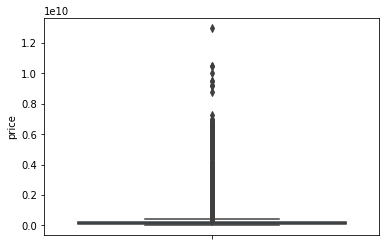

In [21]:

sns.boxplot(y='price', data=data,showfliers=True);

In [22]:
data = data[data['price'] <= 286500000]
data = data[data['price'] > 93000]

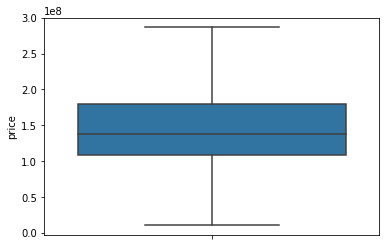

In [23]:

sns.boxplot(y='price', data=data,showfliers=True);

C:\Users\tab\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


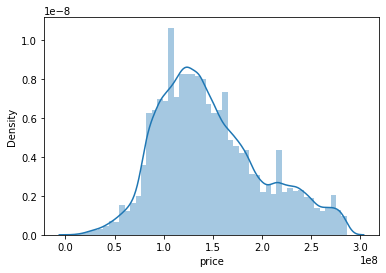

In [24]:
sns.distplot(data.price)

# Outliers for seating

In [25]:

# Persentasi Outliers seating Feature
print(f'Persentase outliers: {round(len(outliers(data,data.seating))/len(data.seating)*100,2)}%')

Persentase outliers: 0.89%


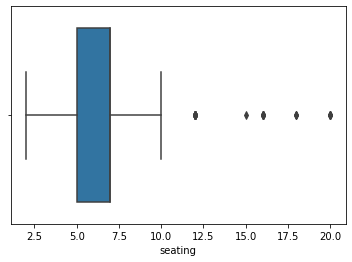

In [26]:

sns.boxplot(x='seating', data=data,showfliers=True);

In [27]:
data = data[data['seating'] <= 10]

In [28]:
outliers(data, data.seating).sort_values('seating', ascending=False)['seating'].value_counts()

2     590
10     14
Name: seating, dtype: int64

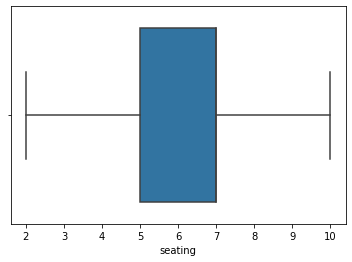

In [29]:

sns.boxplot(x='seating', data=data,showfliers=True);

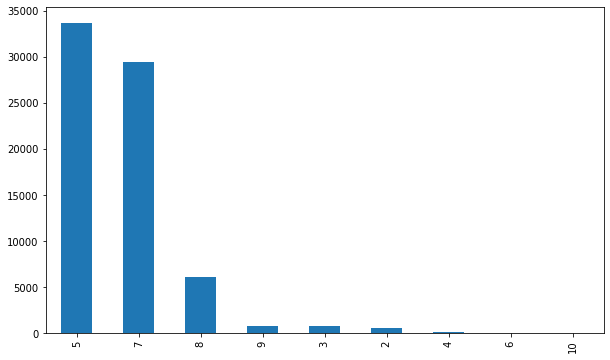

In [30]:
plt.figure(figsize=(10,6))
data.seating.value_counts().plot(kind='bar')

# Outliers for year

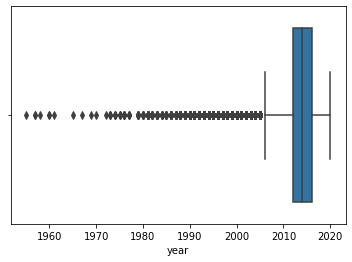

In [31]:
# Persentasi Outliers year Feature
sns.boxplot(x='year', data=data,showfliers=True);

In [32]:
print(f'Persentase outliers: {round(len(outliers(data,data.year))/len(data.year)*100,2)}%')

Persentase outliers: 6.39%


In [33]:
data = data[data['year'] >= 2006]

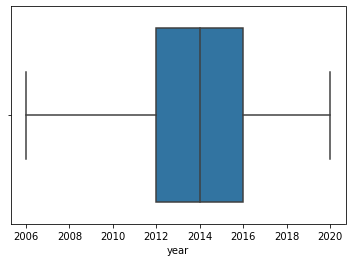

In [34]:
# Persentasi Outliers year Feature
sns.boxplot(x='year', data=data,showfliers=True);

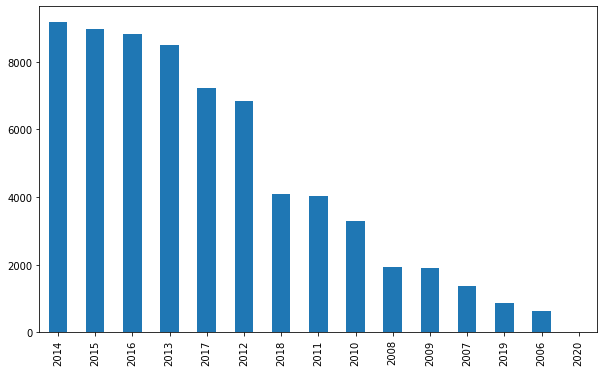

In [35]:
plt.figure(figsize=(10,6))
data.year.value_counts().plot(kind='bar')

# Outliers for milage

In [36]:
data['milage'] =data['milage'].astype(int)

In [37]:
print(f'Persentase outliers: {round(len(outliers(data,data.milage))/len(data.milage)*100,2)}%')

Persentase outliers: 2.9%


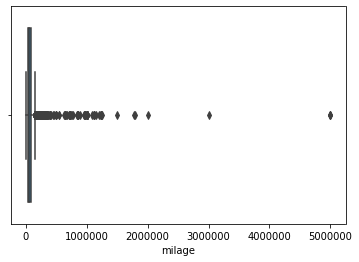

In [38]:
# Persentasi Outliers milage Feature
sns.boxplot(x='milage', data=data,showfliers=True);

In [39]:
data = data[data['milage'] <= 150000]

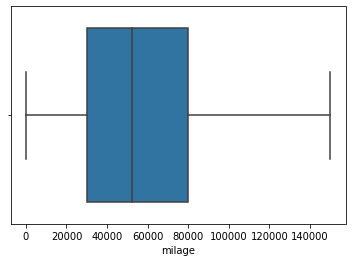

In [40]:
# Persentasi Outliers milage Feature
sns.boxplot(x='milage', data=data,showfliers=True);

C:\Users\tab\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


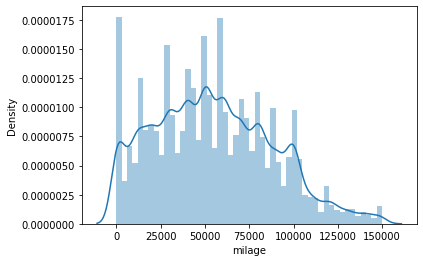

In [41]:
sns.distplot(data.milage)

In [42]:
data.head(5)

,band,model,fuelType,bodytype,transmission,seating,year,milage,color,place,price
0,Nissan,X-Trail,Pertamax,SUV,Manual,5,2010,250,Silver,Wonogiri,115000000
1,Mazda,2,Pertamax,Sedan,Manual,5,2012,67500,Hijau,Surabaya,105000000
4,Mercedes-Benz,C200K,Pertamax,Sedan,Automatic,5,2008,50000,Silver,Jakarta Utara,162000000
6,Chevrolet,Captiva,Solar,SUV,Automatic,7,2011,76000,Hitam,Tangerang,155000000
7,Toyota,Kijang Innova,Solar,MPV,Manual,8,2010,77500,Silver,Medan,188000000


# Feature engineering

## 1. Data Cleaning for null value

In [43]:
data.isnull()

,band,model,fuelType,bodytype,transmission,seating,year,milage,color,place,price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
89579,False,False,False,False,False,False,False,False,False,False,False
89580,False,False,False,False,False,False,False,False,False,False,False
89582,False,False,False,False,False,False,False,False,False,False,False
89583,False,False,False,False,False,False,False,False,False,False,False


In [44]:
data.dropna(inplace=True)

# 2. Encoding Categorical Data

In [45]:
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), round((data[col].isna().sum()/len(data[col]))*100,2),
                      data[col].nunique()])
desc = pd.DataFrame(columns=['column', 'dtype', 'NumbOfNull', 'NullPercent', 'NUnique'],data=list_item)

desc

,column,dtype,NumbOfNull,NullPercent,NUnique
0,band,object,0,0.0,35
1,model,object,0,0.0,265
2,fuelType,object,0,0.0,6
3,bodytype,object,0,0.0,18
4,transmission,object,0,0.0,2
5,seating,int32,0,0.0,9
6,year,int64,0,0.0,15
7,milage,int32,0,0.0,2662
8,color,object,0,0.0,14
9,place,object,0,0.0,194


We can see that car's models have 285 unique values, car's band have 37 unique values this value. This unique values is too large to be modeled as a one-hot encoded, because The matrix model would be so large and take long computation especially for tree-based model. The problem with label encoder is label encoder would give ordinal attribute even if the data is non-ordinal especially for linear model.To overcome this problem we would using label encoder but also together with mix-max scaling to minimize the label so, the ordinal difference would'nt be so much differences that the model wouldn't be so much affected.

In [46]:
data_ohe = data
data_le = data
data_inf = data
data_ohe = data

In [47]:
data.to_csv('data.csv')

# Label Encoder

In [48]:
le = preprocessing.LabelEncoder()


In [49]:
trans = data_le[['band', 'model', 'fuelType', 'bodytype','transmission', 'color', 'place']]

le.fit(trans['band'])
data_le['band'] = le.transform(trans['band'])
np.save('band.npy', le.classes_)

le.fit(trans['model'])
data_le['model'] = le.transform(trans['model'])
np.save('model.npy', le.classes_)


le.fit(trans['fuelType'])
data_le['fuelType'] = le.transform(trans['fuelType'])
np.save('fuelType.npy', le.classes_)


le.fit(trans['bodytype'])
data_le['bodytype'] = le.transform(trans['bodytype'])
np.save('bodytype.npy', le.classes_)

le.fit(trans['transmission'])
data_le['transmission'] = le.transform(trans['transmission'])
np.save('transmission.npy', le.classes_)


le.fit(trans['color'])
data_le['color'] = le.transform(trans['color'])
np.save('color.npy', le.classes_)

                           
le.fit(trans['place'])
data_le['place'] = le.transform(trans['place'])
np.save('place.npy', le.classes_)

# Export CSV file

In [51]:
data_le.to_csv('data_le.csv')